In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = gym.make("FrozenLake-v0")

[2017-06-14 17:03:42,746] Making new env: FrozenLake-v0


In [50]:
q = np.zeros(shape=(env.observation_space.n,env.action_space.n))
learning_rate = 0.7
discount = 0.9
epsilon = 0.1
num_episodes = 100000
reward_array = []

In [51]:
for i in range(0,num_episodes):
    state = env.reset()
    for j in range(0,10000):
        if(np.random.uniform()>epsilon):
            action = np.argmax(q[state,:])
        else:
            action = np.random.randint(env.action_space.n)
        new_state,reward,done,_ = env.step(action)
        q[state,action] = q[state,action] + learning_rate*(reward + discount*np.max(q[new_state,:]) - q[state,action])
        state = new_state
        if done:
            reward_array.append(reward)
            break            

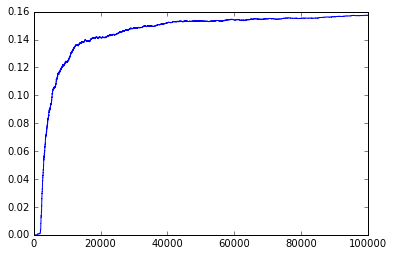

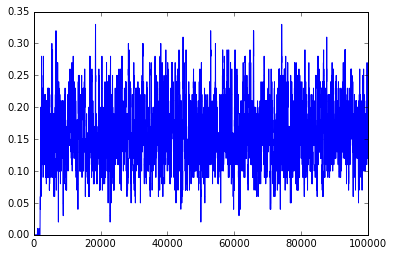

In [52]:
plot_reward = []
plot_reward.append(0)
for i in range(0,100):
    plot_reward[-1] += reward_array[i]
for i in range(0,len(reward_array)-100):
    plot_reward.append(plot_reward[-1]-reward_array[i]+reward_array[i+100])

for i in range(0,len(plot_reward)):
    plot_reward[i]/=100.0
    
for i in range(1,len(reward_array)):
    reward_array[i] += reward_array[i-1] 
for i in range(1,len(reward_array)):
    reward_array[i] /= (i+1)
    
plt.figure()
plt.plot(reward_array)
plt.show()
plt.figure()
plt.plot(plot_reward)
plt.show()

In [34]:
print np.mean(plot_reward)

0.159889190298
